<a href="https://colab.research.google.com/github/feniltailor22/Machine-Learning-Projects/blob/main/Wholesale_Customer_Data_Classification_using_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Wholesale customers data.csv')

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
#Preprocessing the data as we don't know which feature have more impact(more weight) on our target function.
#Methods to preprocess the data- normalize and StandardSCaler
#Here, we are using normalize.
#It scale input vectors individually to unit norm (vector length).

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
scaler= normalize(df)

In [ ]:
df_scaler= pd.DataFrame(data=scaler,columns=df.columns)

In [ ]:
df_scaler.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [ ]:
df_scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    float64
 1   Region            440 non-null    float64
 2   Fresh             440 non-null    float64
 3   Milk              440 non-null    float64
 4   Grocery           440 non-null    float64
 5   Frozen            440 non-null    float64
 6   Detergents_Paper  440 non-null    float64
 7   Delicassen        440 non-null    float64
dtypes: float64(8)
memory usage: 27.6 KB


In [ ]:
import scipy.cluster.hierarchy as sch

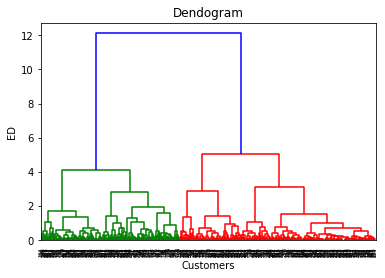

In [ ]:
#Plotting the Denrogram using scipy library.
dendrogram= sch.dendrogram(sch.linkage(df_scaler,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

In [ ]:
hc= AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')

In [ ]:
#Now we will fit and predict the data in a single line of code.
y_hc= hc.fit_predict(df_scaler)

In [ ]:
#Visulizing clusters in 2D.
df_scaler.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

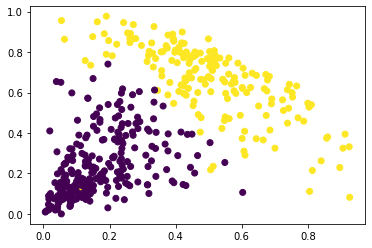

In [ ]:
plt.scatter(df_scaler['Milk'],df_scaler['Grocery'],c=hc.labels_)
#X_axis= Milk
#Y_axis= Grocery

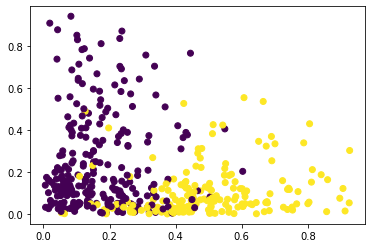

In [ ]:
plt.scatter(df_scaler['Milk'],df_scaler['Frozen'],c=hc.labels_)

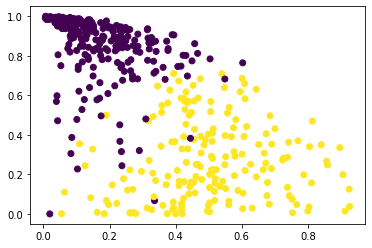

In [ ]:
plt.scatter(df_scaler['Milk'],df_scaler['Fresh'],c=hc.labels_)

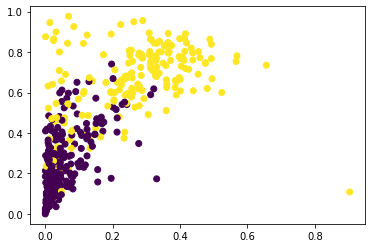

In [ ]:
plt.scatter(df_scaler['Detergents_Paper'],df_scaler['Grocery'],c=hc.labels_)

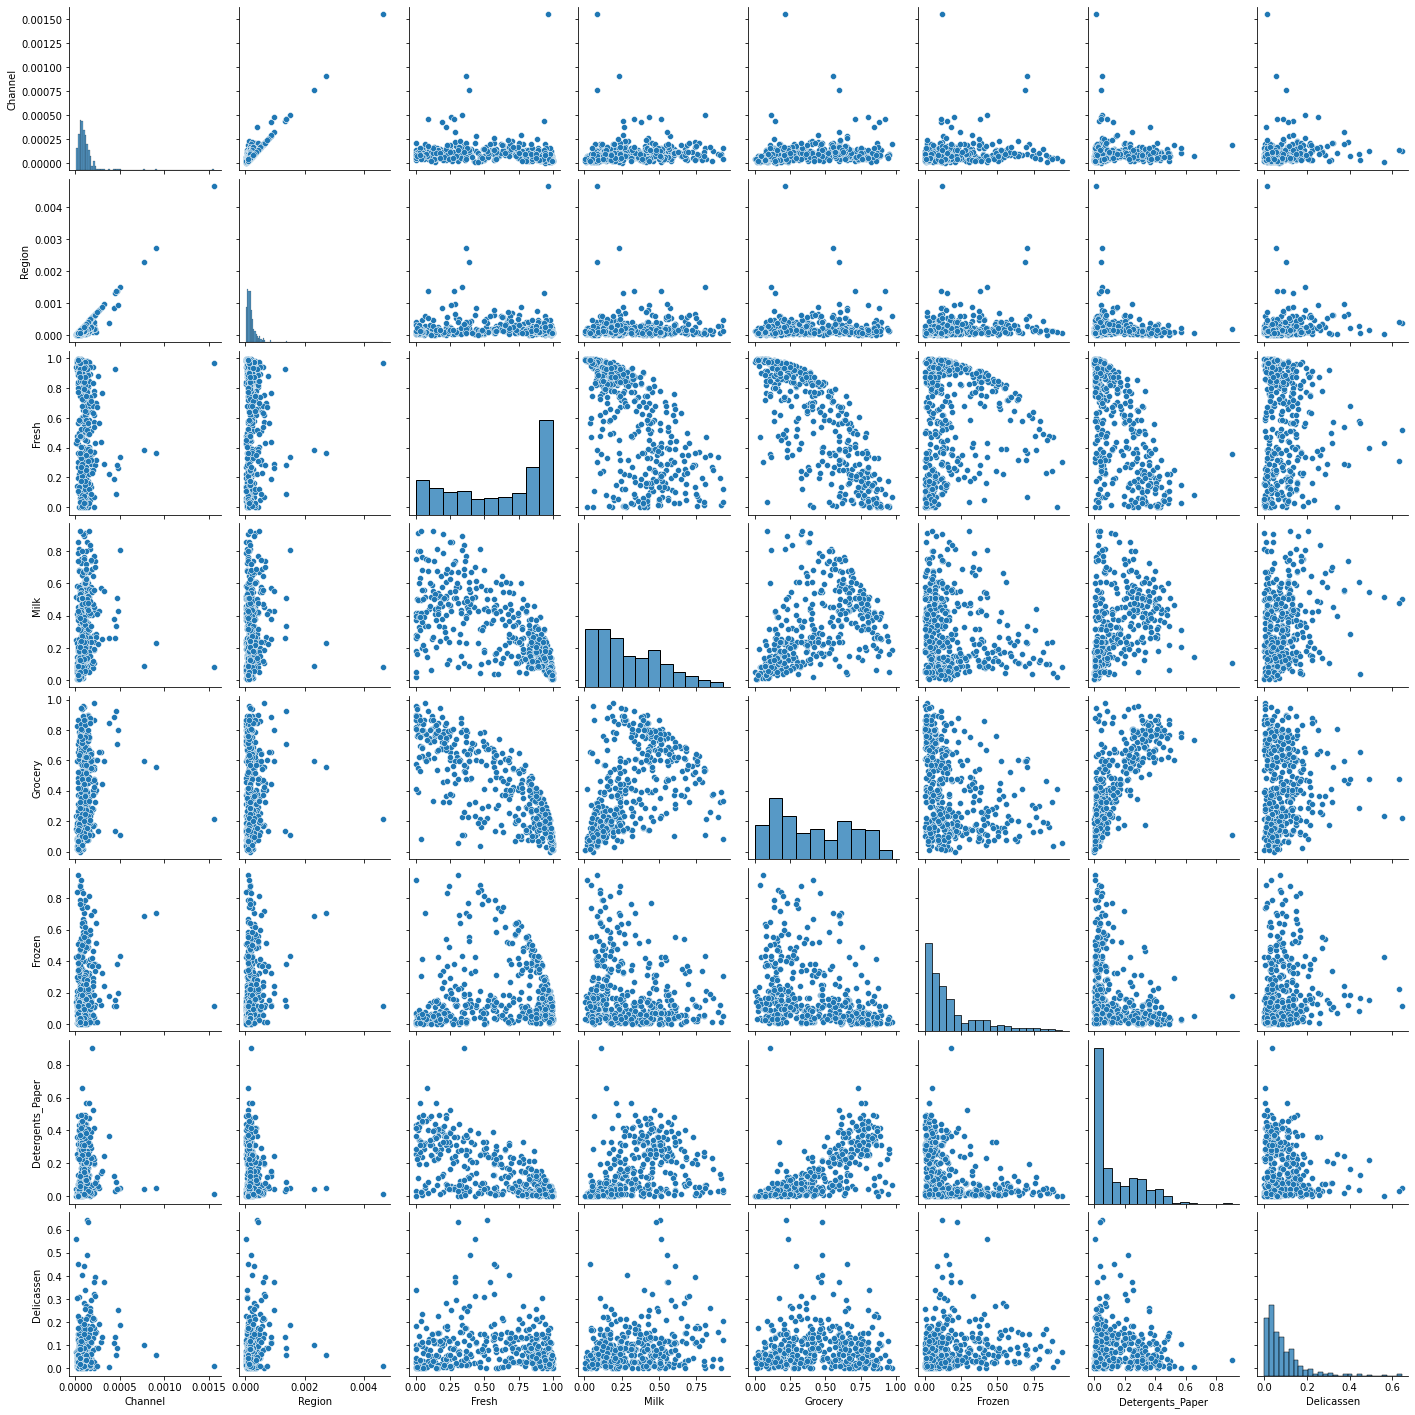

In [ ]:
sns.pairplot(df_scaler)